# Übersicht des annotierten Datensatzes

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [66]:
# Gesamten Datensatz einlesen

train_df = pd.read_csv("..\Korpora\Referenzdatensatz_HateSpeech_Deutsch\RefKorpHateSpeechDe_Train_OD.txt", sep="\t", header=0)
test_df = pd.read_csv("..\Korpora\Referenzdatensatz_HateSpeech_Deutsch\RefKorpHateSpeechDe_Test_OD.txt", sep="\t")

df_ganz_detail = pd.concat([train_df, test_df])

In [67]:
# Neue Spalte: Korpusname (ermittelt über die ID)

def map_corp(id):
    id = str(id)
    if id[0] == '1': return 'GermEval18'
    elif id[0] == '2': return 'GermEval19'
    elif id[0] == '3': return 'HASOC19'
    elif id[0] == '4': return 'HASOC20'
    elif id[0] == '5': return 'Covid19-Abusive'

df_ganz_detail['Korpus'] = df_ganz_detail['corpus_id'].map(map_corp)
df_ganz_detail = df_ganz_detail.drop(axis=1, labels=['corpus_id','tweet']) 

In [43]:
df_ganz_detail

,binarylabel,finelabel,Korpus
0,NOT,NOT,HASOC20
1,NEG,HATE,GermEval19
2,NOT,NOT,HASOC20
3,NOT,NOT,HASOC19
4,NEG,HATE,GermEval18
...,...,...,...
9923,NOT,NOT,GermEval18
9924,NEG,PRFN,HASOC20
9925,NEG,INSOFF,GermEval19
9926,NEG,INSOFF,GermEval19


In [44]:
# Labelverteilung: NEG / nicht NEG
# Stacked Barplot horizontal, mit unterschiedlichen Farben für die verschiedenen Datensätze
# also: finelabel-Spalte weg
df_ganz = df_ganz_detail.drop(axis=1, labels="finelabel")
df_ganz.head()


,binarylabel,Korpus
0,NOT,HASOC20
1,NEG,GermEval19
2,NOT,HASOC20
3,NOT,HASOC19
4,NEG,GermEval18


Text(0.5, 0, 'Anzahl an Tweets')

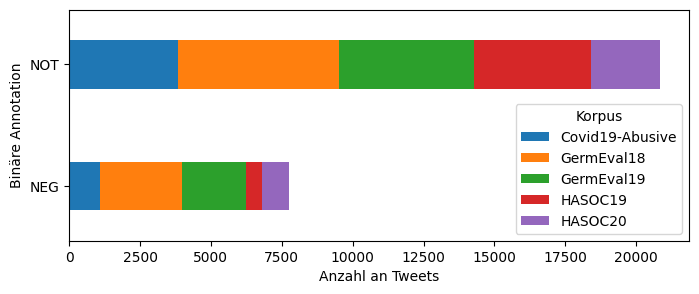

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set_theme(style="ticks", color_codes=True)
#sns.catplot(x="binarylabel", kind="count", data=df_ganz, hue="Korpus")

bylabel = df_ganz.groupby("binarylabel").Korpus.value_counts()

# TODO: Farbe pro Datensatz festlegen
plt.style.use("default")
labelplot = bylabel.unstack().plot.barh(stacked="True", xlabel="Binäre Annotation", width=0.4, figsize=(8,3))
plt.xlabel("Anzahl an Tweets")
#plt.bar_label(labelplot.containers[0], label_type="center")

Text(0.5, 0, 'Anzahl an Tweets')

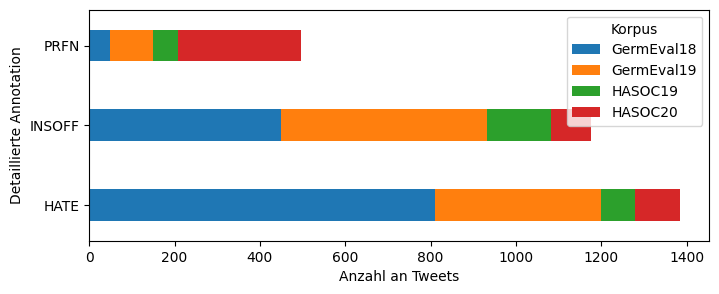

In [68]:
df_ganz_detail = df_ganz_detail.drop(df_ganz_detail[df_ganz_detail['Korpus'] == "Covid19-Abusive"].index)
df_ganz_detail = df_ganz_detail.drop(df_ganz_detail[df_ganz_detail['finelabel'] == "NOT"].index)
df_ganz_detail = df_ganz_detail.drop(axis=1, labels="binarylabel")

byfinelabel = df_ganz_detail.groupby(by="finelabel").Korpus.value_counts()

plt.style.use("default")
labelplot = byfinelabel.unstack().plot.barh(stacked="True", xlabel="Detaillierte Annotation", width=0.4, figsize=(8,3))
plt.xlabel("Anzahl an Tweets")

## Detaillierte Annotation

In [ ]:
# Detaillierte Annotation einlesen